<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/multirex-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are workin in Google Colab use this to install dependencies. When installing `multirex`, `taurex3` is automatically installed.

In [1]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [1]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This is for developing purposes
%load_ext autoreload 
%autoreload 2

## Creating a single system

In [3]:
# Radii and masses are in solar units
star=mrex.Star(temperature=5777,radius=1,mass=1)

# For planets we assume earth units (earth mass and radius)
planet=mrex.Planet(radius=1,mass=1)

# Atmospher
atmo=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=-4, # This is the log10(mix-ratio)
    )
)
planet.set_atmosphere(atmo)

# sma is semi-major axis in AU
system=mrex.System(star=star,planet=planet,sma=1)

Let's create the transmission model:

In [4]:
system.make_tm()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [5]:
# wl in microns
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
wn[:10]

array([333.33333333, 334.87347378, 336.42073033, 337.97513585,
       339.53672339, 341.10552611, 342.68157736, 344.26491064,
       345.85555958, 347.45355799])

In [6]:
fig, ax = system.plot_spectrum(wn_grid=wn)

You can manipulate your figure:

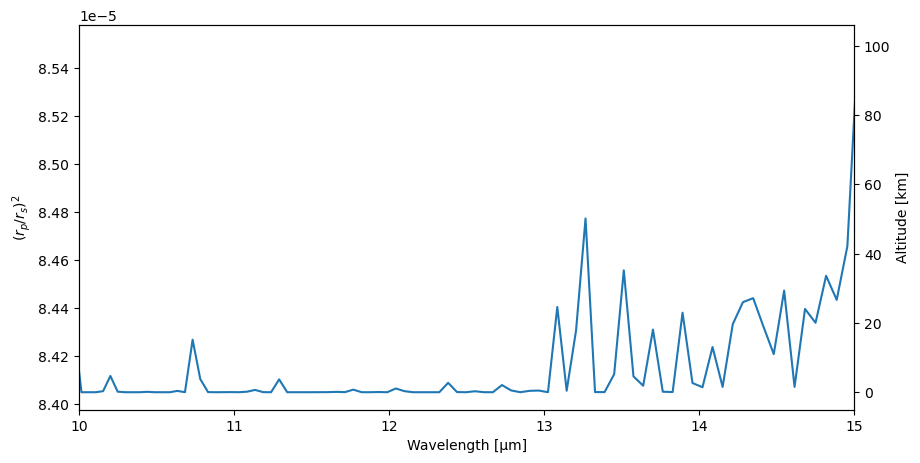

In [7]:
ax.set_xlim(10,15)
fig

Now we can show contibutions:

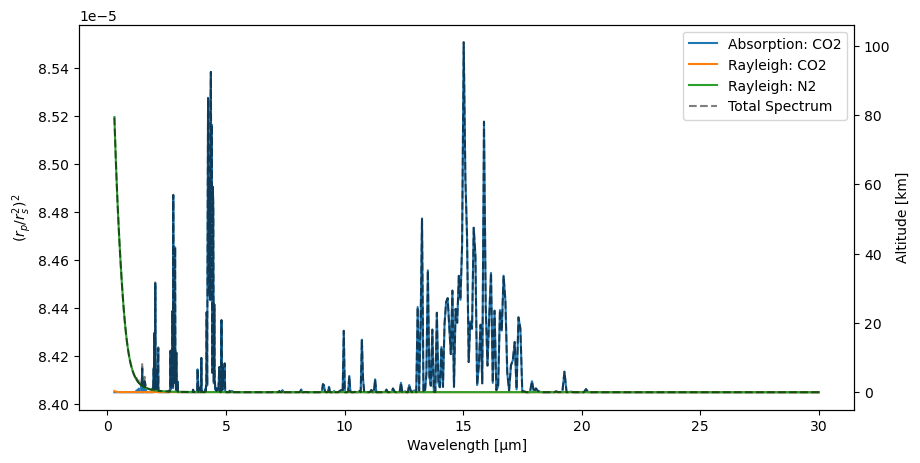

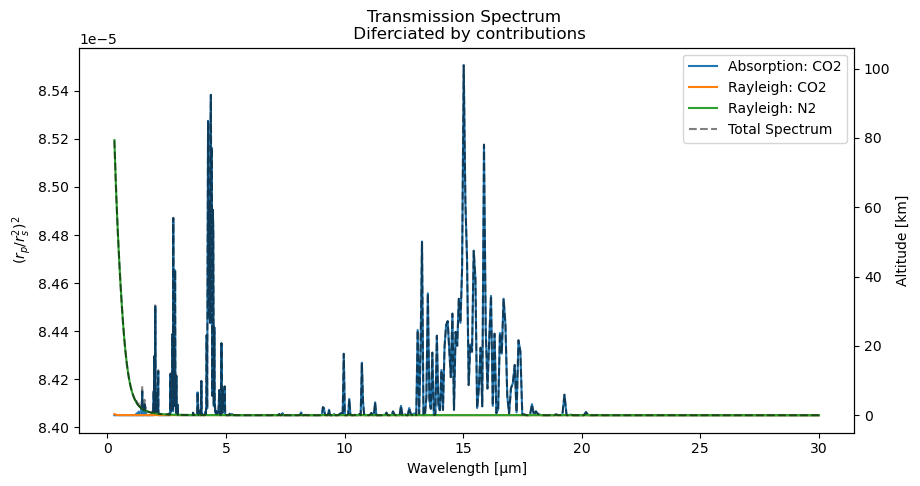

In [8]:
fig, ax = system.plot_contributions(wn_grid=wn, showfig=True, showspectrum=True) ## Add option showfig = False, plot_contributions(..., showspectrum=True)
ax.set_title("Transmission Spectrum \n Diferciated by contributions")
fig

In [9]:
data= system.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
    )

Exploring universes: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


Generating observations for 10 spectra...


In [10]:
data.keys()

dict_keys(['spectra', 'observations'])

In [11]:
data["spectra"].describe()

params                                                              \
         sma          seed p_radius p_mass        p_seed atm temperature   
count   10.0  1.000000e+00     10.0   10.0  1.000000e+00            10.0   
mean     1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   
std      0.0           NaN      0.0    0.0           NaN             0.0   
min      1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   
25%      1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   
50%      1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   
75%      1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   
max      1.0  1.712102e+09      1.0    1.0  1.712102e+09           288.0   

                                                                ...  \
      atm base_pressure atm top_pressure      atm seed atm CO2  ...   
count              10.0             10.0  1.000000e+00    10.0  ...   
mean           100000.0              1.0  1.712102e+09    -4.0  ...   
std                 0.0              0.0           NaN     0.0  ...   
min            100000.0              1.0  1.712102e+09    -4.0  ...   
25%            100000.0              1.0  1.712102e+09    -4.0  ...   
50%            100000.0              1.0  1.712102e+09    -4.0  ...   
75%            100000.0              1.0  1.712102e+09    -4.0  ...   
max            100000.0              1.0  1.712102e+09    -4.0  ...   

                     data                                         \
      0.31270820219292045 0.31127000362355567 0.3098384195756855   
count        1.000000e+01           10.000000       1.000000e+01   
mean         8.515397e-05            0.000085       8.516315e-05   
std          1.428562e-20            0.000000       1.428562e-20   
min          8.515397e-05            0.000085       8.516315e-05   
25%          8.515397e-05            0.000085       8.516315e-05   
50%          8.515397e-05            0.000085       8.516315e-05   
75%          8.515397e-05            0.000085       8.516315e-05   
max          8.515397e-05            0.000085       8.516315e-05   

                                                                  \
      0.30841341962799274 0.30699497349907345 0.3055830510467927   
count        1.000000e+01        1.000000e+01          10.000000   
mean         8.516773e-05        8.517231e-05           0.000085   
std          1.428562e-20        1.428562e-20           0.000000   
min          8.516773e-05        8.517231e-05           0.000085   
25%          8.516773e-05        8.517231e-05           0.000085   
50%          8.516773e-05        8.517231e-05           0.000085   
75%          8.516773e-05        8.517231e-05           0.000085   
max          8.516773e-05        8.517231e-05           0.000085   

                                                                 \
      0.3041776222676445 0.30277865729611425 0.3013861264040437   
count       1.000000e+01        1.000000e+01          10.000000   
mean        8.518152e-05        8.518614e-05           0.000085   
std         1.428562e-20        1.428562e-20           0.000000   
min         8.518152e-05        8.518614e-05           0.000085   
25%         8.518152e-05        8.518614e-05           0.000085   
50%         8.518152e-05        8.518614e-05           0.000085   
75%         8.518152e-05        8.518614e-05           0.000085   
max         8.518152e-05        8.518614e-05           0.000085   

                           
      0.29999999999999993  
count        1.000000e+01  
mean         8.519481e-05  
std          1.428562e-20  
min          8.519481e-05  
25%          8.519481e-05  
50%          8.519481e-05  
75%          8.519481e-05  
max          8.519481e-05  

[8 rows x 1014 columns]

In [12]:
data["observations"].describe()

params                        data                     \
              noise      SNR 29.999999999999996 29.862024862864565   
count  1.000000e+04  10000.0       1.000000e+04       1.000000e+04   
mean   1.456121e-07     10.0       8.405145e-05       8.404901e-05   
std    1.606796e-20      0.0       1.437839e-07       1.463180e-07   
min    1.456121e-07     10.0       8.340279e-05       8.344472e-05   
25%    1.456121e-07     10.0       8.395404e-05       8.395021e-05   
50%    1.456121e-07     10.0       8.405341e-05       8.404902e-05   
75%    1.456121e-07     10.0       8.414953e-05       8.414702e-05   
max    1.456121e-07     10.0       8.456017e-05       8.464095e-05   

                                                              \
      29.72468429701139 29.58797538393846 29.451895218566502   
count      1.000000e+04      1.000000e+04       1.000000e+04   
mean       8.405189e-05      8.405094e-05       8.404978e-05   
std        1.460175e-07      1.437904e-07       1.457353e-07   
min        8.348294e-05      8.354890e-05       8.352661e-05   
25%        8.395380e-05      8.395283e-05       8.395050e-05   
50%        8.405079e-05      8.405132e-05       8.405065e-05   
75%        8.414909e-05      8.414776e-05       8.414747e-05   
max        8.472496e-05      8.462073e-05       8.460919e-05   

                                                              ...  \
      29.31644090917717 29.181609577351622 29.04739835790937  ...   
count      1.000000e+04       1.000000e+04      1.000000e+04  ...   
mean       8.405148e-05       8.404780e-05      8.405045e-05  ...   
std        1.453036e-07       1.470936e-07      1.447423e-07  ...   
min        8.354483e-05       8.353631e-05      8.347705e-05  ...   
25%        8.395420e-05       8.394878e-05      8.395210e-05  ...   
50%        8.405112e-05       8.404713e-05      8.405066e-05  ...   
75%        8.414844e-05       8.414786e-05      8.414672e-05  ...   
max        8.461851e-05       8.462380e-05      8.465504e-05  ...   

                                                                  \
      0.31270820219292045 0.31127000362355567 0.3098384195756855   
count        1.000000e+04        1.000000e+04       1.000000e+04   
mean         8.515032e-05        8.515888e-05       8.516306e-05   
std          1.459389e-07        1.458677e-07       1.447905e-07   
min          8.458839e-05        8.460350e-05       8.459706e-05   
25%          8.505146e-05        8.506035e-05       8.506440e-05   
50%          8.514898e-05        8.515900e-05       8.516438e-05   
75%          8.524840e-05        8.525911e-05       8.525935e-05   
max          8.570174e-05        8.575462e-05       8.571663e-05   

                                                                  \
      0.30841341962799274 0.30699497349907345 0.3055830510467927   
count        1.000000e+04        1.000000e+04       1.000000e+04   
mean         8.516419e-05        8.517060e-05       8.517763e-05   
std          1.439646e-07        1.441394e-07       1.462819e-07   
min          8.464385e-05        8.457878e-05       8.456750e-05   
25%          8.506762e-05        8.507298e-05       8.507753e-05   
50%          8.516275e-05        8.517039e-05       8.517680e-05   
75%          8.526072e-05        8.526776e-05       8.527751e-05   
max          8.569570e-05        8.576052e-05       8.578319e-05   

                                                                 \
      0.3041776222676445 0.30277865729611425 0.3013861264040437   
count       1.000000e+04        1.000000e+04       1.000000e+04   
mean        8.518356e-05        8.518821e-05       8.519089e-05   
std         1.454723e-07        1.463189e-07       1.456530e-07   
min         8.464540e-05        8.463085e-05       8.460462e-05   
25%         8.508501e-05        8.508958e-05       8.509298e-05   
50%         8.518457e-05        8.518827e-05       8.519076e-05   
75%         8.528037e-05        8.528544e-05       8.528961e-05   
max         8.5

## Creating a Multiverse

First we can create the components of a planetary system.

In [13]:
stars = mrex.Star(temperature=5777,radius=1,mass=1)
planets = mrex.Planet(radius=1,mass=1)
atmos=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=(-4,-1), # This is the range of log10(mix-ratio) of CO2
        H2O=(-4,-2),
        CH4=(-6,-3),
        O3=-6
    )
)
planets.set_atmosphere(atmos)
systems=mrex.System(star=stars,planet=planets,sma=1)
systems.make_tm()


Now we can initialize our model and use the other features of multirex.

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [45]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
data = systems.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
)
# This will produce 10 000 observations in total
"""
spectra=True,
observations=True, # Give me the observations
"""

Exploring universes: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


Generating observations for 10 spectra...


'\nspectra=True,\nobservations=True, # Give me the observations\n'

Now we can visualize the dataset.

In [46]:
data["spectra"]

params                                                                 \
     sma  seed p_radius p_mass p_seed atm temperature atm base_pressure   
0      1  None        1      1   None             288          100000.0   
1      1  None        1      1   None             288          100000.0   
2      1  None        1      1   None             288          100000.0   
3      1  None        1      1   None             288          100000.0   
4      1  None        1      1   None             288          100000.0   
5      1  None        1      1   None             288          100000.0   
6      1  None        1      1   None             288          100000.0   
7      1  None        1      1   None             288          100000.0   
8      1  None        1      1   None             288          100000.0   
9      1  None        1      1   None             288          100000.0   

                                          ...                data  \
  atm top_pressure atm fill_gas atm seed  ... 0.31270820219292045   
0                1           N2     None  ...            0.000085   
1                1           N2     None  ...            0.000085   
2                1           N2     None  ...            0.000085   
3                1           N2     None  ...            0.000085   
4                1           N2     None  ...            0.000085   
5                1           N2     None  ...            0.000085   
6                1           N2     None  ...            0.000085   
7                1           N2     None  ...            0.000085   
8                1           N2     None  ...            0.000085   
9                1           N2     None  ...            0.000085   

                                                              \
  0.31127000362355567 0.3098384195756855 0.30841341962799274   
0            0.000085           0.000085            0.000085   
1            0.000085           0.000085            0.000085   
2            0.000085           0.000085            0.000085   
3            0.000085           0.000085            0.000085   
4            0.000085           0.000085            0.000085   
5            0.000085           0.000085            0.000085   
6            0.000085           0.000085            0.000085   
7            0.000085           0.000085            0.000085   
8            0.000085           0.000085            0.000085   
9            0.000085           0.000085            0.000085   

                                                             \
  0.30699497349907345 0.3055830510467927 0.3041776222676445   
0            0.000085           0.000085           0.000085   
1            0.000085           0.000085           0.000085   
2            0.000085           0.000085           0.000085   
3            0.000085           0.000085           0.000085   
4            0.000085           0.000085           0.000085   
5            0.000085           0.000085           0.000085   
6            0.000085           0.000085           0.000085   
7            0.000085           0.000085           0.000085   
8            0.000085           0.000085           0.000085   
9            0.000085           0.000085           0.000085   

                                                              
  0.30277865729611425 0.3013861264040437 0.29999999999999993  
0            0.000085           0.000085            0.000085  
1            0.000085           0.000085            0.000085  
2            0.000085           0.000085            0.000085  
3            0.000085           0.000085            0.000085  
4            0.000085           0.000085            0.000085  
5            0.000085           0.000085            0.000085  
6            0.000085           0.000085            0.000085  
7            0.000085           0.000085            0.000085  
8            0.000085           0.000085            0.000085  
9            0.000085           0.000085            0

As you can see the planets are the same since you don't include variations in the properties of the planets.

In [47]:
data["observations"].describe()

params                        data                     \
              noise      SNR 29.999999999999996 29.862024862864565   
count  1.000000e+04  10000.0       1.000000e+04       1.000000e+04   
mean   2.099782e-07     10.0       8.405279e-05       8.413795e-05   
std    2.243695e-08      0.0       2.102701e-07       2.164665e-07   
min    1.780724e-07     10.0       8.332746e-05       8.304299e-05   
25%    1.812088e-07     10.0       8.390995e-05       8.399458e-05   
50%    2.158816e-07     10.0       8.405405e-05       8.413660e-05   
75%    2.313329e-07     10.0       8.418982e-05       8.428299e-05   
max    2.358362e-07     10.0       8.489572e-05       8.496391e-05   

                                                              \
      29.72468429701139 29.58797538393846 29.451895218566502   
count      1.000000e+04      1.000000e+04       1.000000e+04   
mean       8.405221e-05      8.405513e-05       8.405006e-05   
std        2.107032e-07      2.114548e-07       2.138838e-07   
min        8.299666e-05      8.314246e-05       8.315879e-05   
25%        8.391345e-05      8.391713e-05       8.390305e-05   
50%        8.405186e-05      8.405655e-05       8.405481e-05   
75%        8.419091e-05      8.419302e-05       8.419433e-05   
max        8.488252e-05      8.499384e-05       8.490254e-05   

                                                              ...  \
      29.31644090917717 29.181609577351622 29.04739835790937  ...   
count      1.000000e+04       1.000000e+04      1.000000e+04  ...   
mean       8.410476e-05       8.407357e-05      8.405555e-05  ...   
std        2.111951e-07       2.135467e-07      2.111799e-07  ...   
min        8.335108e-05       8.318546e-05      8.316459e-05  ...   
25%        8.396249e-05       8.393101e-05      8.391709e-05  ...   
50%        8.410647e-05       8.407471e-05      8.405550e-05  ...   
75%        8.424453e-05       8.421571e-05      8.419621e-05  ...   
max        8.492450e-05       8.497560e-05      8.493971e-05  ...   

                                                                  \
      0.31270820219292045 0.31127000362355567 0.3098384195756855   
count        1.000000e+04        1.000000e+04       1.000000e+04   
mean         8.514958e-05        8.515428e-05       8.515750e-05   
std          2.104154e-07        2.119642e-07       2.132953e-07   
min          8.437460e-05        8.439570e-05       8.431653e-05   
25%          8.501063e-05        8.501255e-05       8.501645e-05   
50%          8.515166e-05        8.515469e-05       8.515829e-05   
75%          8.529036e-05        8.529553e-05       8.529690e-05   
max          8.596932e-05        8.592924e-05       8.596502e-05   

                                                                  \
      0.30841341962799274 0.30699497349907345 0.3055830510467927   
count        1.000000e+04        1.000000e+04       1.000000e+04   
mean         8.516613e-05        8.516985e-05       8.517724e-05   
std          2.095347e-07        2.119334e-07       2.113179e-07   
min          8.428745e-05        8.421462e-05       8.432677e-05   
25%          8.502626e-05        8.502825e-05       8.503806e-05   
50%          8.516533e-05        8.517042e-05       8.517772e-05   
75%          8.530595e-05        8.531392e-05       8.531834e-05   
max          8.595449e-05        8.599458e-05       8.611389e-05   

                                                                 \
      0.3041776222676445 0.30277865729611425 0.3013861264040437   
count       1.000000e+04        1.000000e+04       1.000000e+04   
mean        8.517911e-05        8.518598e-05       8.519095e-05   
std         2.111971e-07        2.116619e-07       2.104555e-07   
min         8.431932e-05        8.426026e-05       8.429246e-05   
25%         8.503688e-05        8.504647e-05       8.505166e-05   
50%         8.518183e-05        8.518706e-05       8.518999e-05   
75%         8.532014e-05        8.532916e-05       8.533011e-05   
max         8.5

In [48]:
spectra,obs=data.values()

You generate a dataset with variations in the properties concentration of $CO_2$, you can see the variations in the dataset and view we haver 1000 observations for each concentration.

In [49]:
obs["params"]["atm CO2"].value_counts()

-3.177953    1000
-2.600859    1000
-1.630905    1000
-3.446325    1000
-1.289518    1000
-1.920355    1000
-3.240066    1000
-3.252719    1000
-1.807164    1000
-1.652034    1000
Name: atm CO2, dtype: int64

Text(0.5, 1.0, 'Example of a Spectrum and its observation')

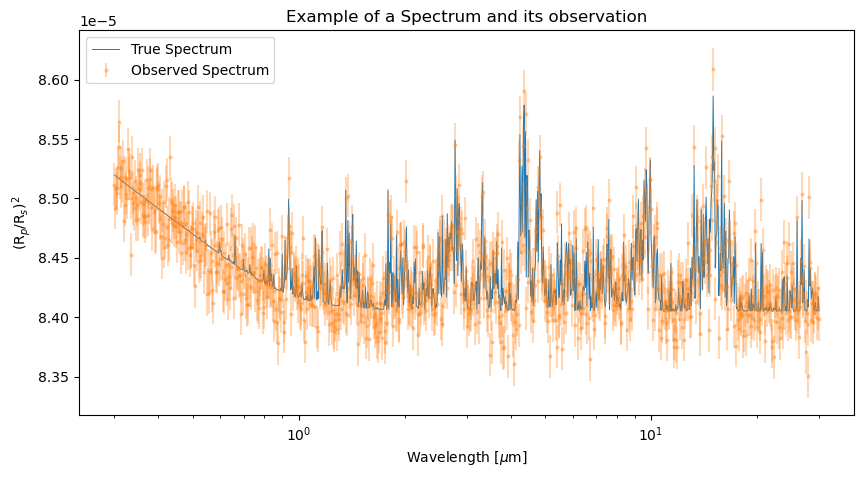

In [50]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra["data"].iloc[0],label="True Spectrum",linewidth=0.7)
plt.errorbar(x=1e4/wn,y=obs["data"].iloc[0],yerr=obs["params"]["noise"][0]*np.ones(1000),
            label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")
plt.legend()
plt.xlabel("Wavelength [$\mu$m]")
plt.ylabel("(R$_p$/R$_s$)$^2$")
plt.title("Example of a Spectrum and its observation")
